<a href="https://colab.research.google.com/github/SunDubey/DeepLearning/blob/main/CNN_Mnist_Transfer__Learning_VGG16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Transfer Learning

**Did transfer learning on VGG16, To do transfer learning ** 

 Transfer Learning consist in starting from a trained network, then re-training it on a new dataset using very small weight updates.

 We will add weights of previously trained model and just load our weights here:

 we will instantiate the convolutional base of VGG16 and load its weights ,add our previously defined fully-connected model on top, and load its weights
freeze the layers of the VGG16 model up to the last convolutional block.

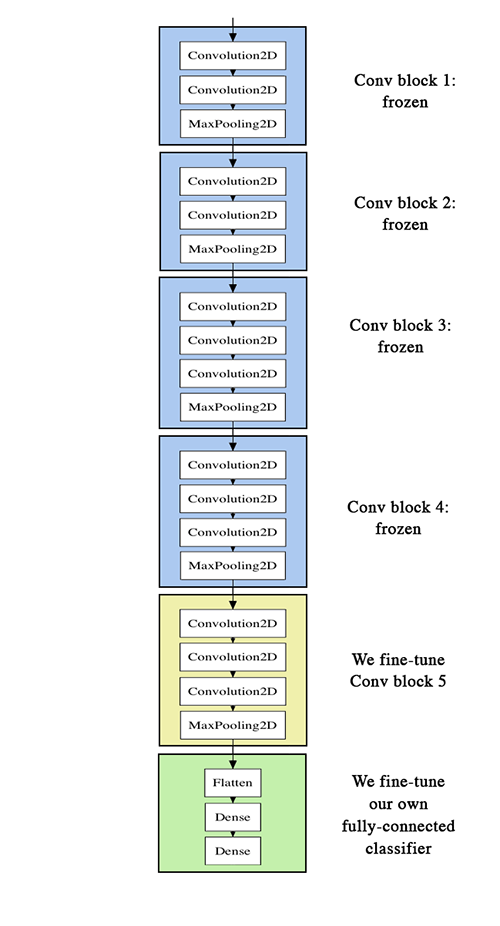

In [ ]:
from keras import applications
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dropout, Flatten, Dense

# path to the model weights files.
weights_path = '../keras/examples/vgg16_weights.h5'
top_model_weights_path = 'fc_model.h5'
# dimensions of our images.
img_width, img_height = 150, 150

train_data_dir = './cats_and_dogs_small/train'
validation_data_dir = './cats_and_dogs_small/validation'
nb_train_samples = 2000
nb_validation_samples = 800
epochs = 50
batch_size = 16





In [ ]:

# build a classifier model to put on top of the convolutional model
top_model = Sequential()
top_model.add(Flatten(input_shape=model.output_shape[1:]))
top_model.add(Dense(256, activation='relu'))
top_model.add(Dropout(0.5))
top_model.add(Dense(1, activation='sigmoid'))

# note that it is necessary to start with a fully-trained
# classifier, including the top classifier,
# in order to successfully do fine-tuning
top_model.load_weights(top_model_weights_path)

# add the model on top of the convolutional base
model.add(top_model)

# build the VGG16 network
model = applications.VGG16(weights='imagenet', include_top=False)
print('Model loaded.')



Here we freeze all convolutional layers up to the last convolutional block:

In [ ]:
# set the first 25 layers (up to the last conv block)
# to non-trainable (weights will not be updated)
for layer in model.layers[:25]:
    layer.trainable = False

# compile the model with a SGD/momentum optimizer
# and a very slow learning rate.
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.SGD(lr=1e-4, momentum=0.9),
              metrics=['accuracy'])


In [ ]:
# prepare data augmentation configuration
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary')

# fine-tune the model
model.fit_generator(
    train_generator,
    samples_per_epoch=nb_train_samples,
    epochs=epochs,
    validation_data=validation_generator,
    nb_val_samples=nb_validation_samples)

**This approach gets us to a validation accuracy of 0.94 after 50 epochs, Transfer learning on VGG16 imporved our accuracy from 0.79-0.81 after 50 epochs to 94%.**

**Here are a few more approaches you can try to get to above 0.95:**

**more aggresive data augmentation**
**more aggressive dropout**
**use of L1 and L2 regularization (also known as "weight decay")**
**fine-tuning one more convolutional block (alongside greater regularization) **